<a href="https://colab.research.google.com/github/filmerxyz/JSTP-22_SkinDiseaseClassificationUsingMachineLearning/blob/master/PJ61403_Ensemble_HarmonicMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Harmonic Mean**

# Import Libraries

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix

from pj61403_utils_functions import *

In [2]:
!git clone https://github.com/EvilPickle-PCSHSPT/PJ61403_DATA_split_50-25-25

fatal: destination path 'PJ61403_DATA_split_50-25-25' already exists and is not an empty directory.


# Data

In [0]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [4]:
test_path = '/content/PJ61403_DATA_split_50-25-25/crop_split_classes_data/test'

test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_data.flow_from_directory(directory=test_path,
                                               target_size=(IMG_WIDTH, IMG_HEIGHT),
                                               batch_size=1,
                                               shuffle=False,
                                               class_mode=None)

test_labels = test_generator.classes

Found 63 images belonging to 4 classes.


In [0]:
def HarmonicMean_ensemble(test_data, model_1, model_2, model_3):
  model_1 = tf.keras.models.load_model(model_1)
  model_2 = tf.keras.models.load_model(model_2)
  model_3 = tf.keras.models.load_model(model_3)
  ans_1 = model_1.predict(test_data)
  ans_2 = model_2.predict(test_data)
  ans_3 = model_3.predict(test_data)
  all_answer_list = []
  for i in range(len(ans_1)):
    answer_list = []
    for j in range(len(ans_1[i])):
      mean_ans = 3/((1/ans_1[i][j]) + (1/ans_2[i][j]) + (1/ans_3[i][j]))
      answer_list.append(mean_ans)
    all_answer_list.append(answer_list)
  return all_answer_list

In [0]:
final_answer = HarmonicMean_ensemble(test_generator, 'pj61043_densenet121_model_1.h5', 'pj61043_densenet121_model_2.h5', 'pj61043_resnet50_model_1.h5')

In [0]:
final_answer_array = np.asarray(final_answer) 

In [0]:
classes_names = ['ad', 'nm', 'ps', 'sk']

# Confusion Matrix

In [0]:
cm = confusion_matrix(test_labels, final_answer_array.argmax(axis=1))

## Without Normalize

Confusion matrix, without normalization
[[12  3  2  0]
 [ 0 15  0  0]
 [ 0  1 15  0]
 [ 1  0  0 14]]


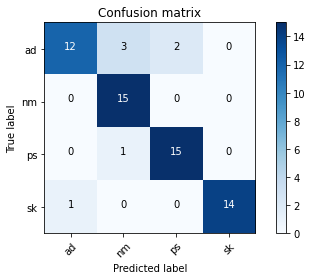

In [10]:
plot_confusion_matrix(cm, classes_names, False)

## With Normalize

Normalized confusion matrix
[[0.70588235 0.17647059 0.11764706 0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.0625     0.9375     0.        ]
 [0.06666667 0.         0.         0.93333333]]


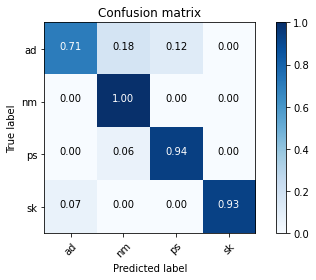

In [11]:
plot_confusion_matrix(cm, classes_names, True)

# Classification Report

In [12]:
y_pred = np.argmax(final_answer_array, axis=1)
print('Classification Report')
print(classification_report(test_labels, y_pred, target_names=classes_names))

Classification Report
              precision    recall  f1-score   support

          ad       0.92      0.71      0.80        17
          nm       0.79      1.00      0.88        15
          ps       0.88      0.94      0.91        16
          sk       1.00      0.93      0.97        15

    accuracy                           0.89        63
   macro avg       0.90      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63

